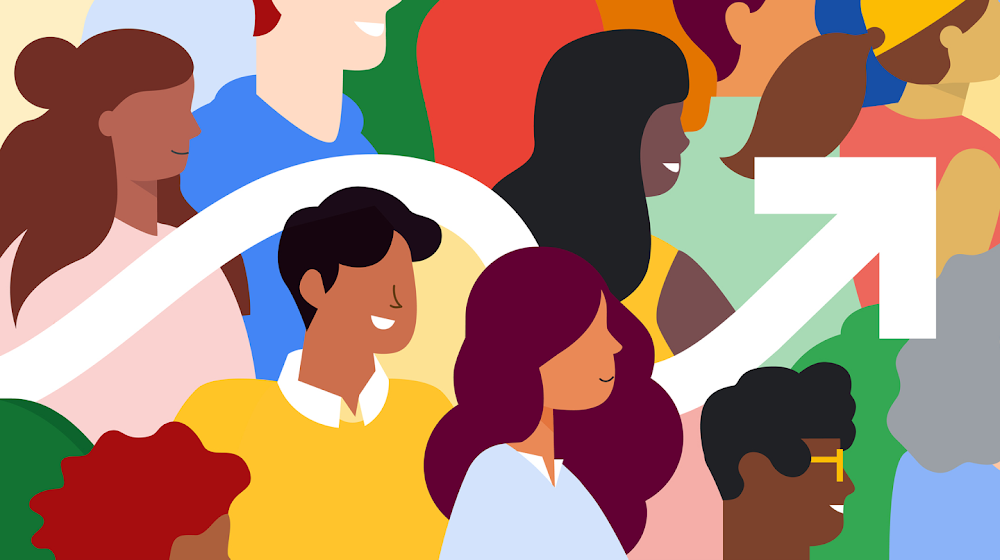

Image Size: Height=560, Width=1000, Channels=3
Total Pixels in the image: 560000


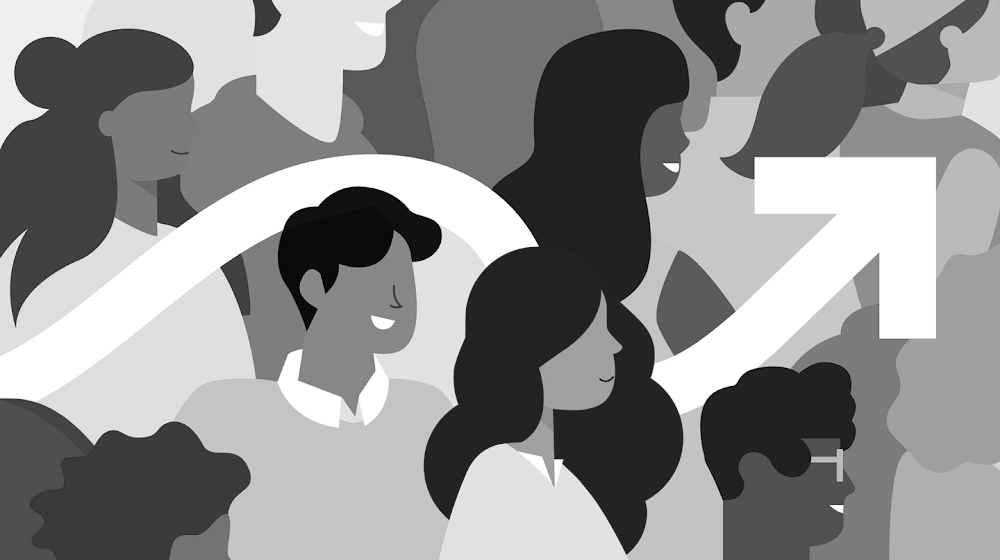

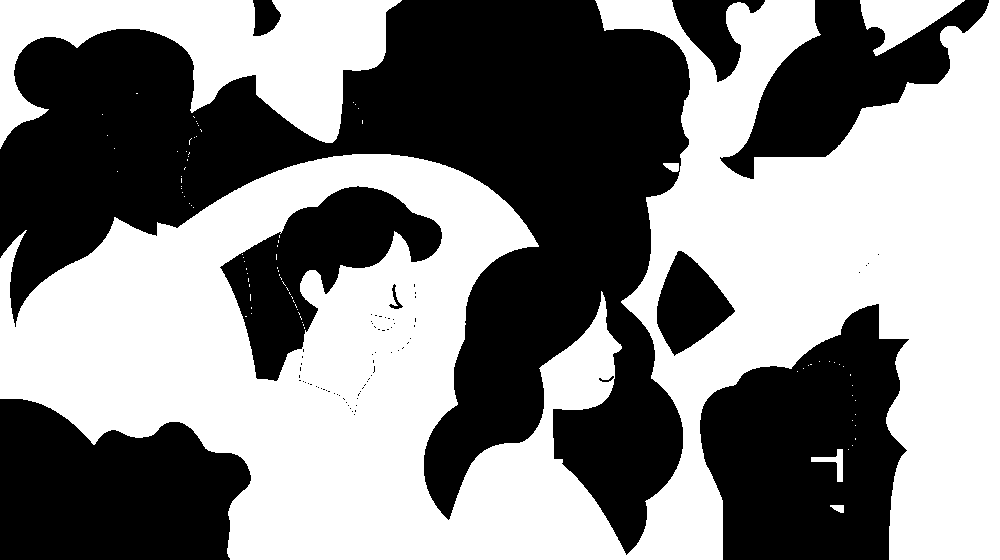

Black Pixels Area: 267615 pixels
Image Size (in pixels): 560x1000


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/ig2.png'
image_bgr = cv2.imread(image_path)

cv2_imshow(image_bgr)


height, width, channels = image_bgr.shape
print(f"Image Size: Height={height}, Width={width}, Channels={channels}")

total_pixels = height * width
print(f"Total Pixels in the image: {total_pixels}")


image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2_imshow(image_gray)



threshold_value = 127
_, image_binary = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

cv2_imshow(image_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()


black_pixels = np.sum(image_binary == 0)
print(f"Black Pixels Area: {black_pixels} pixels")

print(f"Image Size (in pixels): {height}x{width}")


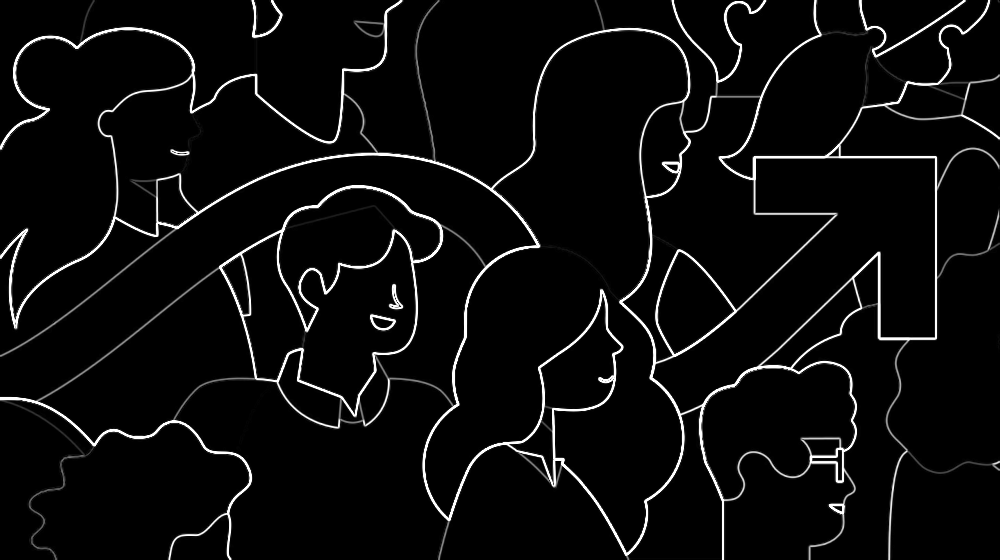

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/ig2.png', cv2.IMREAD_GRAYSCALE)


sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

sobel_edge = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(sobel_edge)


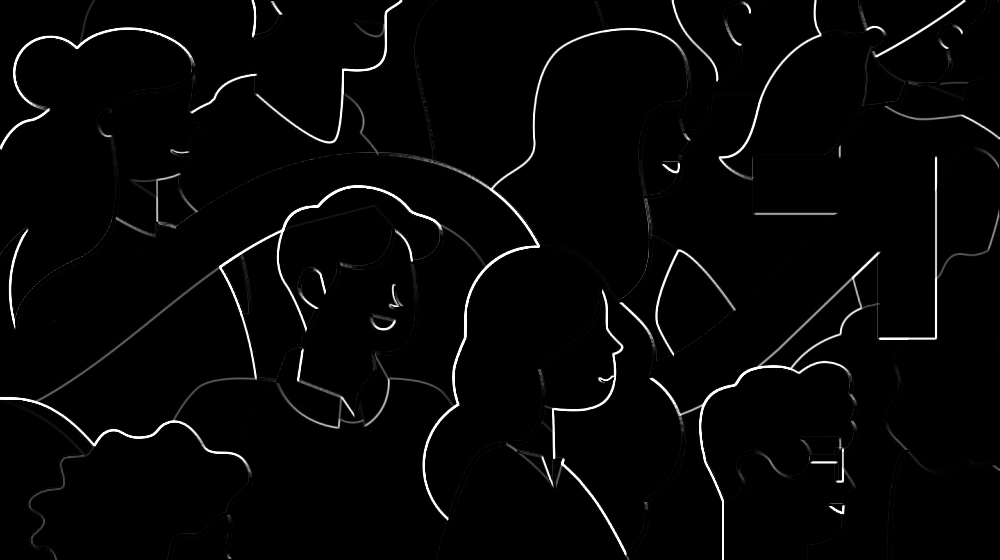

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread('/content/ig2.png', cv2.IMREAD_GRAYSCALE)

# Prewitt kernels for x and y directions
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply Prewitt operator
edge_prewitt_x = cv2.filter2D(image, -1, prewitt_x)
edge_prewitt_y = cv2.filter2D(image, -1, prewitt_y)

# Ensure that both edge images have the same data type (float32) for cv2.magnitude()
edge_prewitt_x = np.float32(edge_prewitt_x)
edge_prewitt_y = np.float32(edge_prewitt_y)

# Combine x and y edges using cv2.magnitude
prewitt_edge = cv2.magnitude(edge_prewitt_x, edge_prewitt_y)

# Display result
cv2_imshow(prewitt_edge)


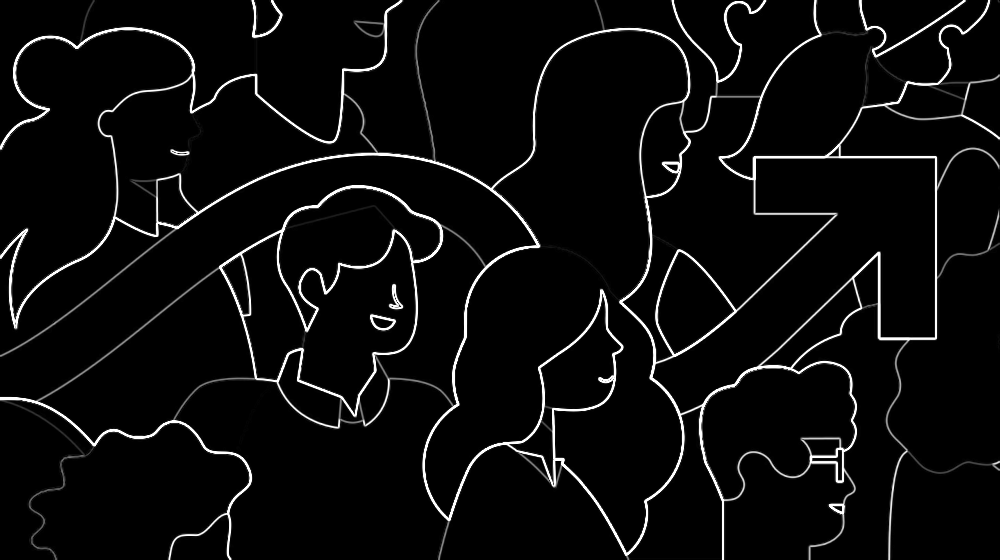

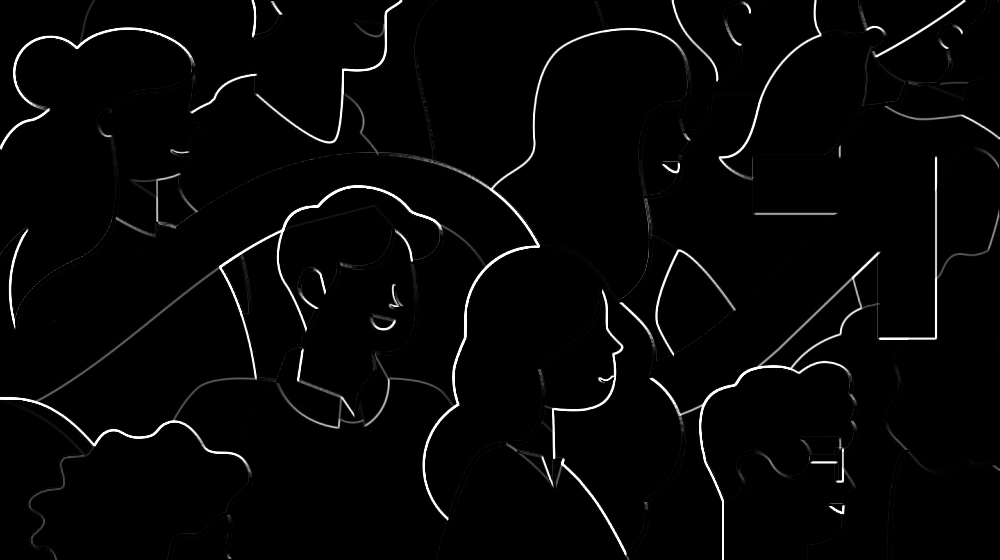

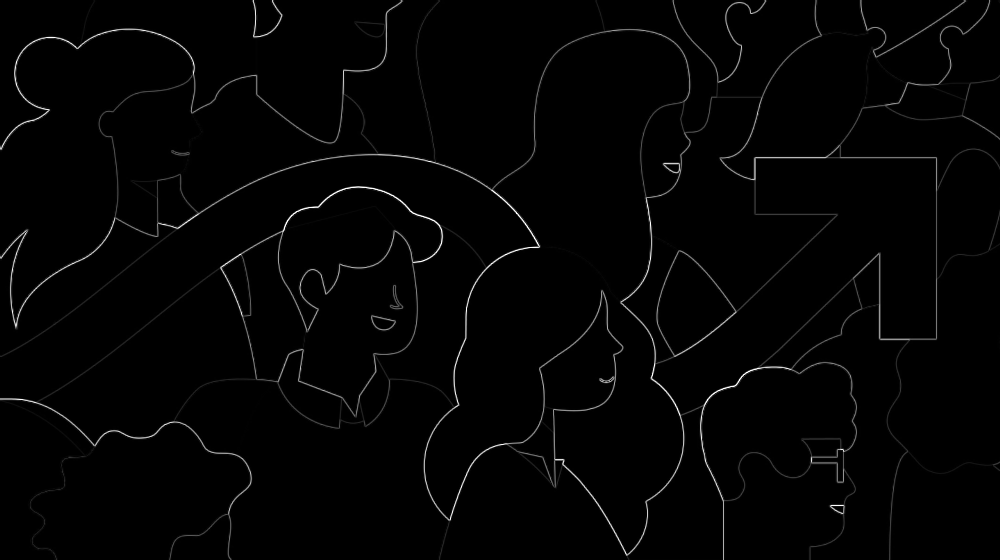

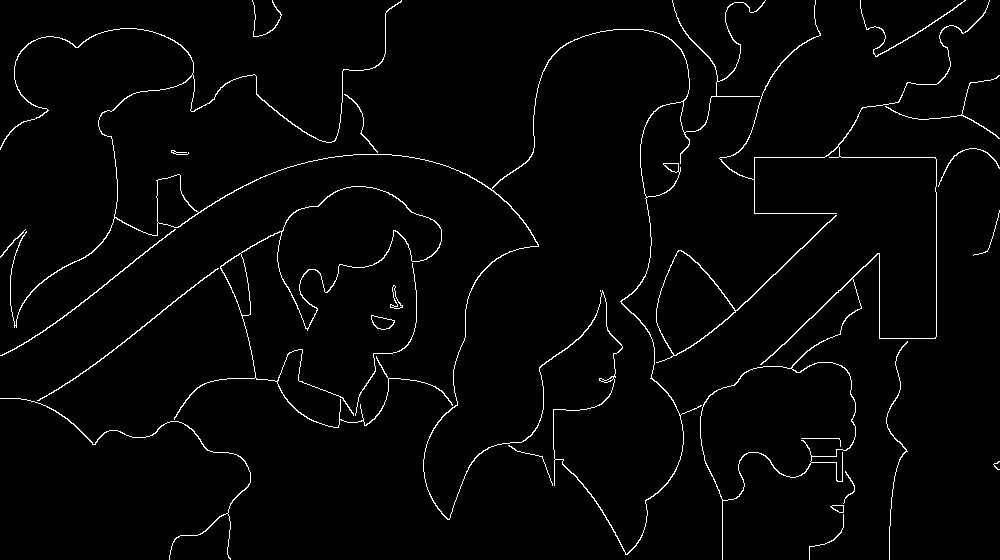

In [13]:
# Sobel Edge Detection (X and Y directions)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Prewitt Edge Detection - already done in previous step, stored in prewitt_edge

# Roberts Cross Operator Edge Detection
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])

roberts_x = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_y)
roberts_edge = cv2.magnitude(roberts_x, roberts_y)

# Canny Edge Detection
canny_edge = cv2.Canny(image, 100, 200)

# Display all edge-detected images
cv2_imshow(sobel_edge)
print("")
cv2_imshow(prewitt_edge)
print("")
cv2_imshow(roberts_edge)
print("")
cv2_imshow(canny_edge)


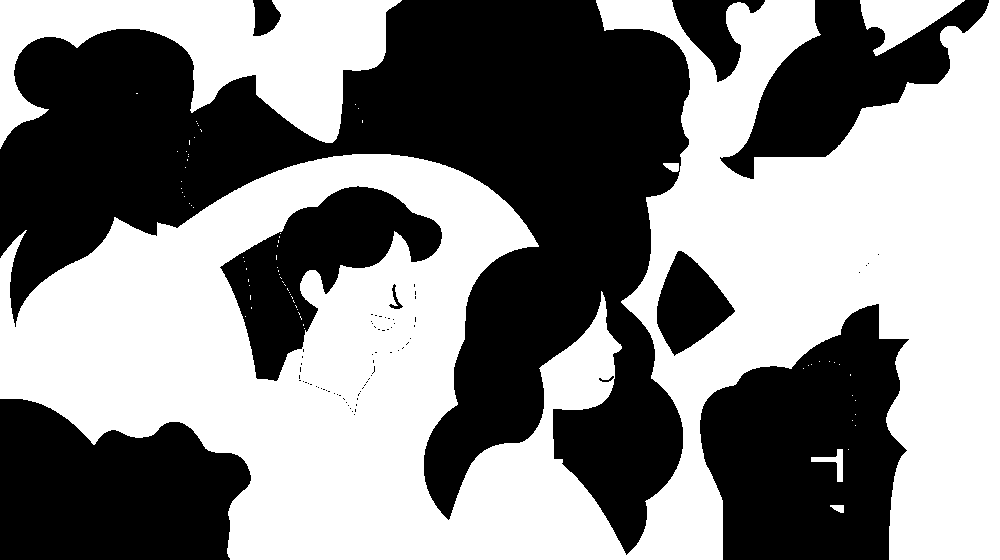

In [14]:
# Apply Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display result of Global Thresholding
cv2_imshow(global_thresh)


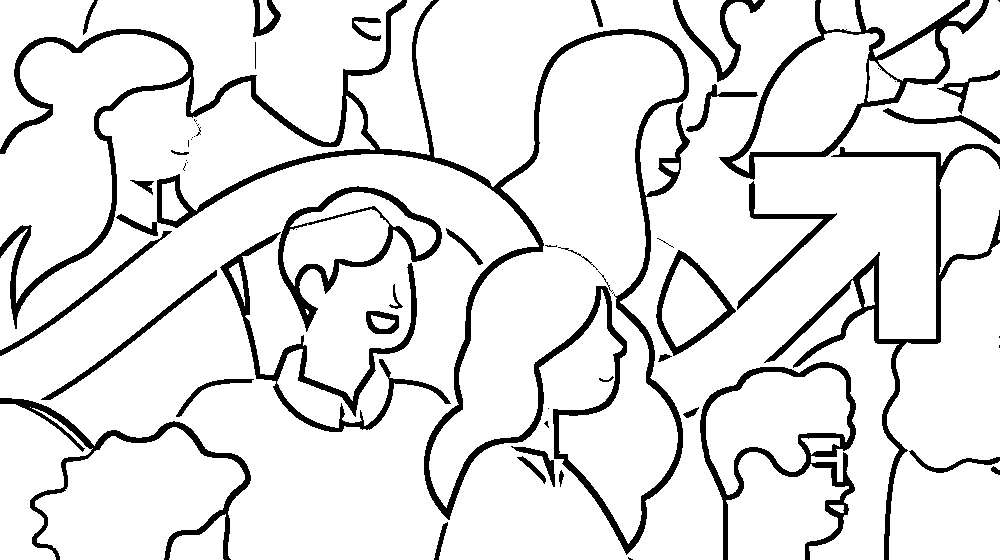

In [15]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display result of Adaptive Thresholding
cv2_imshow(adaptive_thresh)
